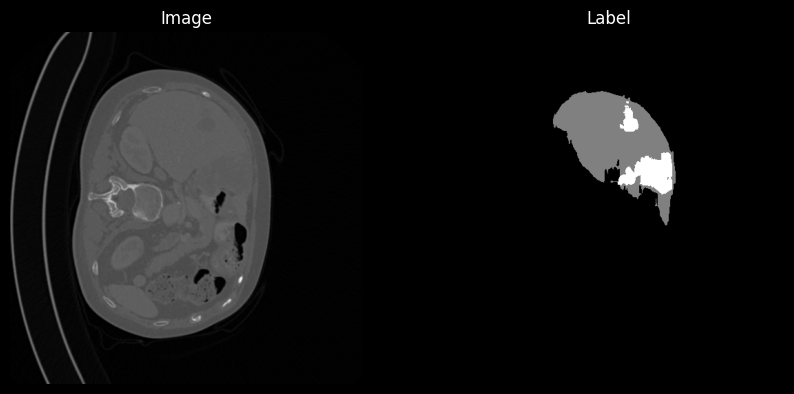

In [12]:
# First, import the necessary libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Function to load a NIfTI file and return the data
def load_nii_file(file_path):
    """Load a NIfTI file."""
    nii_data = nib.load(file_path)
    return nii_data.get_fdata()

# Function to display the image and label side by side
def show_image_and_label(image_path, label_path, slice_index=None):
    """Display image and label side by side."""
    image_data = load_nii_file(image_path)
    label_data = load_nii_file(label_path)

    # If no slice_index is provided, select the middle slice
    if slice_index is None:
        slice_index = image_data.shape[2] // 2

    image_slice = image_data[:, :, slice_index]
    label_slice = label_data[:, :, slice_index]

    # Plot the slices
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(image_slice, cmap='gray')
    axes[0].set_title('Image')
    axes[0].axis('off')

    axes[1].imshow(label_slice, cmap='gray')
    axes[1].set_title('Label')
    axes[1].axis('off')

    plt.show()

# Paths to the NIfTI files
label_path = '/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/2LiTS/media/nas/01_Datasets/CT/LITS/Training Batch 1/segmentation-27.nii'
image_path = '/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/2LiTS/media/nas/01_Datasets/CT/LITS/Training Batch 1/volume-27.nii'

# Call the function to display the files
show_image_and_label(image_path, label_path)



In [ ]:
# pick_out_empty_seg_gt

import os
import nibabel as nib
import numpy as np

# Function to check if a label file is empty
def is_label_empty(label_path):
    """Check if the label NIfTI file is empty (i.e., contains only zeros)."""
    label_data = nib.load(label_path).get_fdata()
    return np.all(label_data == 0)

# Directory containing the files
directory = 'path_to_your_directory'

# List to hold the names of files with empty labels
empty_labels = []

# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.startswith("segmentation-") and filename.endswith(".nii") or filename.endswith(".nii.gz"):
        file_path = os.path.join(directory, filename)
        if is_label_empty(file_path):
            empty_labels.append(filename)

# Print all the file names with empty labels
print("Files with empty labels:")
for name in empty_labels:
    print(name)
